In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# reading csv file
employee_data = pd.read_csv('employee_data.csv')

In [5]:
employee_data.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0


# Preprocessing:
Correct the data in the "height" column by replacing it with random numbers between 150 and 180. Ensure data consistency and integrity before proceeding with analysis.

In [8]:
employee_data ['Height']=np.random.randint(150, 180,size=458)

In [9]:
employee_data.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,164,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,153,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,162,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,179,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,157,231,NaN,5000000.0


# 1. Determine the distribution of employees across each team and calculate the percentage split relative to the total number of employees

In [10]:
team_distribution = employee_data['Team'].value_counts()
team_percentage = (team_distribution / len(employee_data)) * 100
team_percentage

Team
New Orleans Pelicans      4.148472
Memphis Grizzlies         3.930131
Utah Jazz                 3.493450
New York Knicks           3.493450
Milwaukee Bucks           3.493450
Brooklyn Nets             3.275109
Portland Trail Blazers    3.275109
Oklahoma City Thunder     3.275109
Denver Nuggets            3.275109
Washington Wizards        3.275109
Miami Heat                3.275109
Charlotte Hornets         3.275109
Atlanta Hawks             3.275109
San Antonio Spurs         3.275109
Houston Rockets           3.275109
Boston Celtics            3.275109
Indiana Pacers            3.275109
Detroit Pistons           3.275109
Cleveland Cavaliers       3.275109
Chicago Bulls             3.275109
Sacramento Kings          3.275109
Phoenix Suns              3.275109
Los Angeles Lakers        3.275109
Los Angeles Clippers      3.275109
Golden State Warriors     3.275109
Toronto Raptors           3.275109
Philadelphia 76ers        3.275109
Dallas Mavericks          3.275109
Orlando Magic  

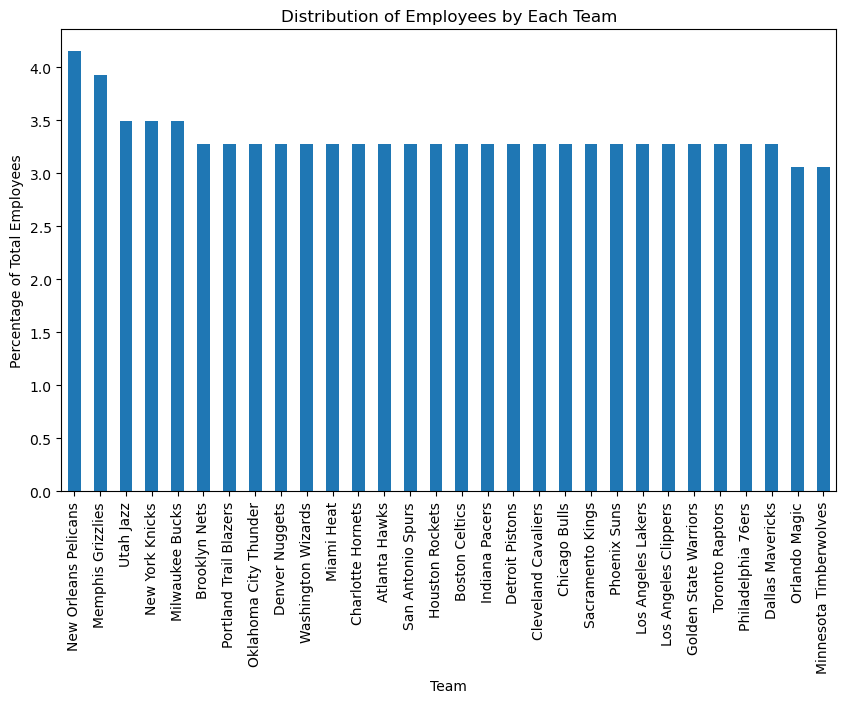

In [13]:
#visual reprasentation
plt.figure(figsize=(10,6))
team_percentage.plot(kind='bar')
plt.title('Distribution of Employees by Each Team')
plt.xlabel('Team')
plt.ylabel('Percentage of Total Employees')
plt.show()

# 2. Segregate employees based on their positions within the company.

In [14]:
position_sort = employee_data['Position'].value_counts()
position_sort

Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64

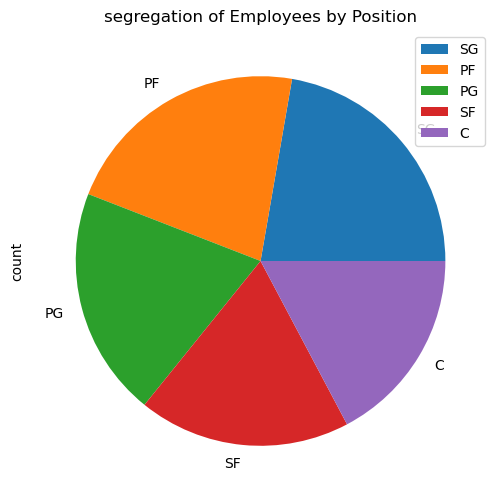

In [18]:
#visual reprasentation
plt.figure(figsize=(10, 6))
position_sort.plot(kind='pie')
plt.title('segregation of Employees by Position')
plt.legend()
plt.show()

# 3. Identify the predominant age group among employees.

In [35]:
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']
employee_data['age_group'] = pd.cut(employee_data['Age'], bins, labels=labels)
age_group_distribution = employee_data['age_group'].value_counts()
age_group_distribution

age_group
26-35    235
18-25    200
36-45     23
46-55      0
56-65      0
65+        0
Name: count, dtype: int64

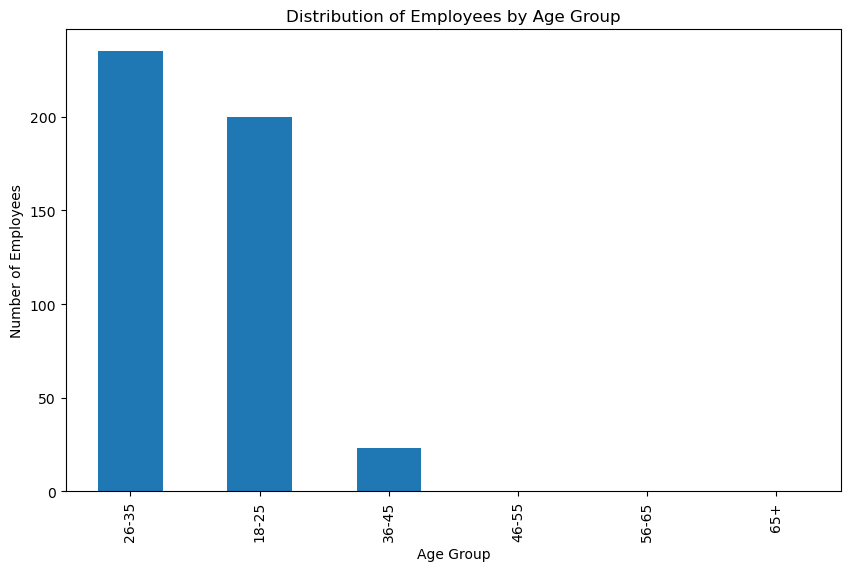

In [36]:
#visual reprasentation
plt.figure(figsize=(10, 6))
age_group_distribution.plot(kind='bar')
plt.title('Distribution of Employees by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Employees')
plt.show()


predominant age group is between 26 to 35

# 4. Discover which team and position have the highest salary expenditure.

In [25]:
salary_exp_by_team = employee_data.groupby(['Team'])[['Salary']].sum()
Team_highest_Exp =salary_exp_by_team['Salary'].sort_values(ascending = False)
Team_highest_Exp .head()

Team
Cleveland Cavaliers      106988689.0
Los Angeles Clippers      94854640.0
Oklahoma City Thunder     93765298.0
Golden State Warriors     88868997.0
Chicago Bulls             86783378.0
Name: Salary, dtype: float64

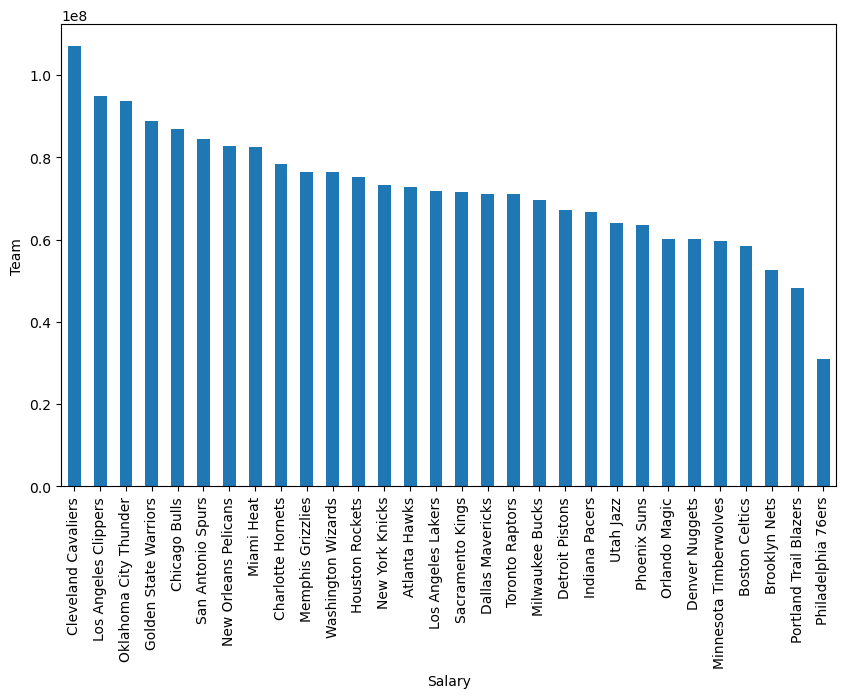

In [27]:
#visual reprasentation
plt.figure(figsize=[10,6])
Team_highest_Exp.plot(kind='bar')
plt.xlabel('Salary')
plt.ylabel('Team')
plt.show()

Team Cleveland Cavaliers   have highest salery expenditure of  106988689.0

# 5. Investigate if there's any correlation between age and salary, and represent it visually.

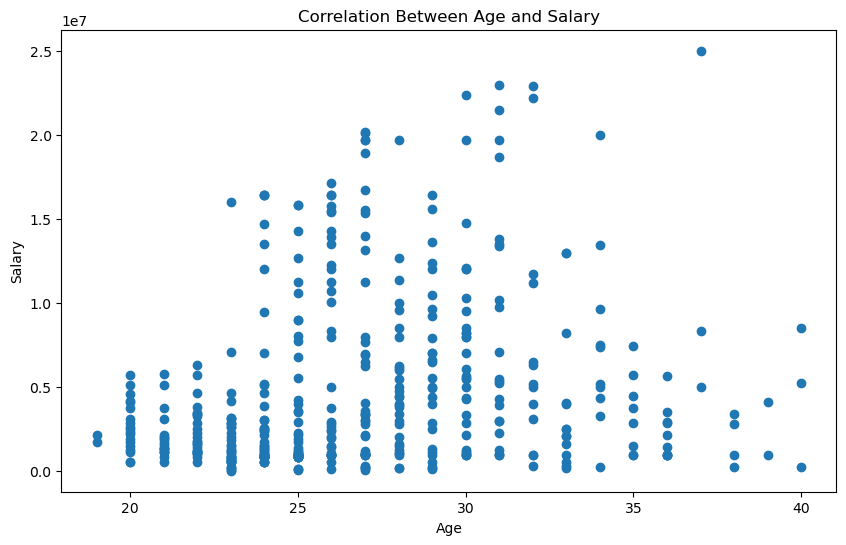

In [29]:

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(employee_data['Age'], employee_data['Salary'])
plt.title('Correlation Between Age and Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()


employees Age between 25 to 35 are getting  higher salery 